In [6]:
import numpy as np
import matplotlib.pyplot as plt
import gillespy2


In [74]:
def CLE(beta1, beta2, a, n1, k2, n2, alpha, dt):
    x = [x0]
    for i in range(len(t) - 1):
        dxi = np.random.normal(0, 1, 3) 
        x_curr = x[-1]
        
        

        F = (
            #beta1 * (pow(a, n1) / (pow(a, n1) + pow(x_curr, n1))) +
            beta2 * (pow(x_curr, n2) / (pow(k2, n2) + pow(x_curr, n2))) -
            alpha * x_curr)
        
        G = (
            #np.sqrt(beta1 * (pow(a, n1) / (pow(a, n1) + pow(x_curr, n1)))) * dxi[0] +
            np.sqrt(beta2 * (pow(x_curr, n2) / (pow(k2, n2) + pow(x_curr, n2)))) * dxi[1] +
            np.sqrt(alpha * x_curr) * dxi[2])
        
        x_next = x_curr + dt * F + np.sqrt(dt) * G

        x = np.hstack([x, x_next])
    return x


In [75]:
beta1=0
a=0
n1=0
beta2=1.2
k2=1
n2=1
alpha=0.01
t = np.linspace(10000,100000,10000)
dt = t[1] - t[0]
x0=200
x_cle = CLE(beta1, beta2, a, n1, k2, n2, alpha, dt)

In [76]:
x_cle.size

10000

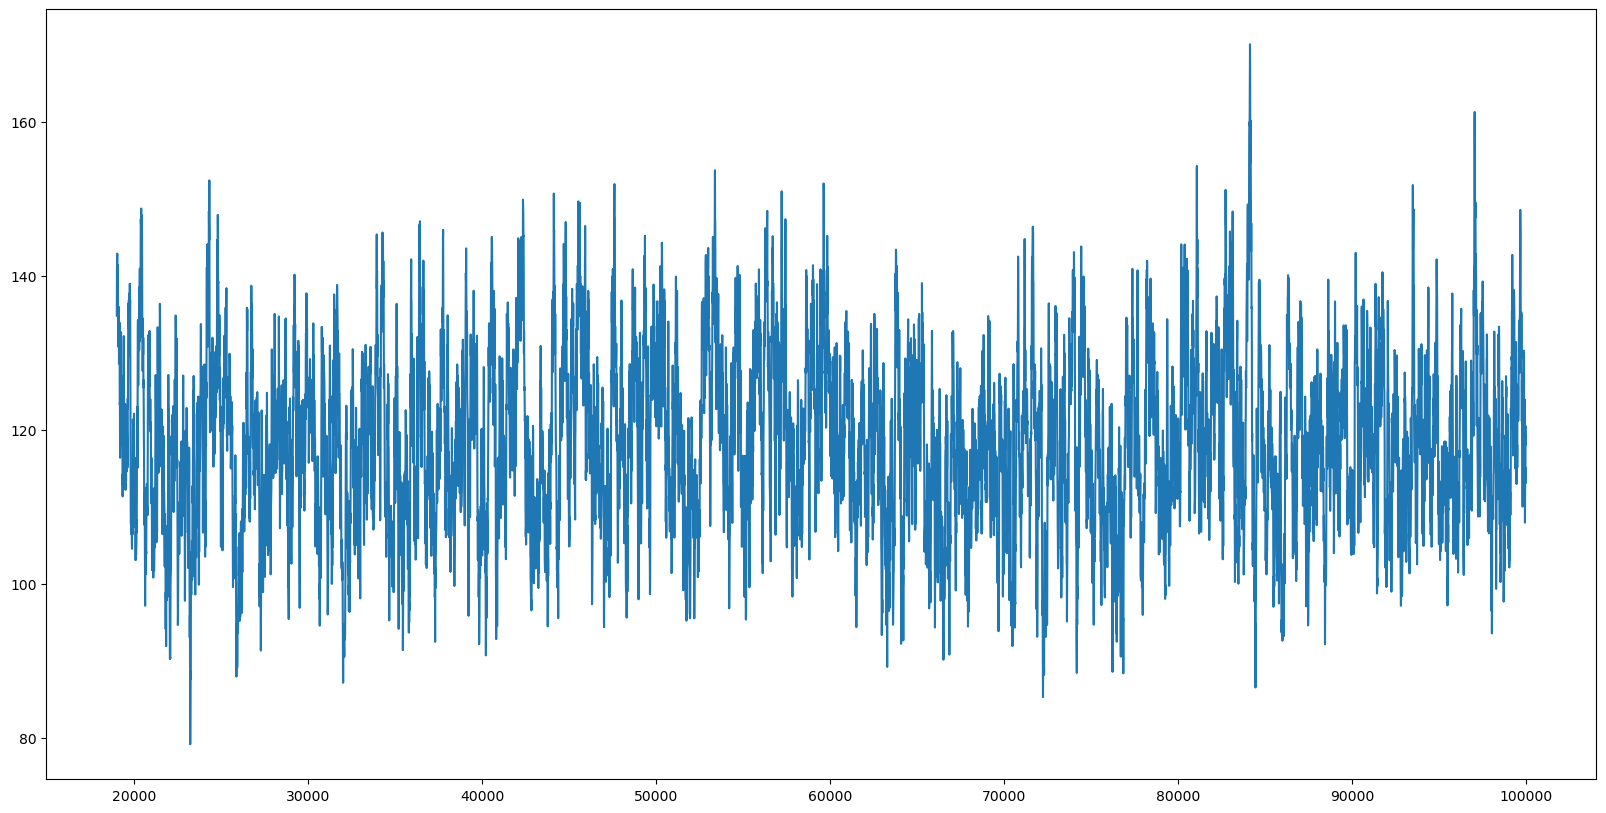

In [10]:
x_cle_trimmed = x_cle[1000:]
t_trimmed = t[1000:]
plt.figure(figsize=(20, 10))
plt.plot(t_trimmed, x_cle_trimmed, label='cle')


In [11]:
print(x_cle_trimmed)
print(t_trimmed)

[134.8545833  140.66526506 141.83945021 ... 119.31384283 118.11268185
 120.43422467]
[ 19000.90009001  19009.9009901   19018.90189019 ...  99981.99819982
  99990.99909991 100000.        ]


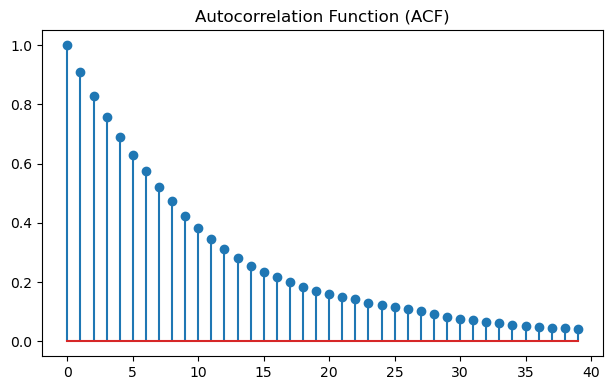

In [12]:
import statsmodels.api as sm
# Calculate the autocorrelation function (ACF)
acf = sm.tsa.acf(x_cle_trimmed, fft=False)


# Calculate the partial autocorrelation function (PACF)
pacf = sm.tsa.pacf(x_cle_trimmed)

# Plot the ACF
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.stem(acf)
plt.title('Autocorrelation Function (ACF)')



plt.tight_layout()
plt.show()


In [13]:
print(acf)

[1.         0.91000502 0.82973733 0.75642998 0.68983818 0.63011643
 0.5735933  0.52068252 0.47240553 0.42476434 0.38283297 0.34423333
 0.31159615 0.28202381 0.25571411 0.23432905 0.2164098  0.20111495
 0.18489689 0.17162127 0.16046529 0.15087961 0.14231822 0.13131817
 0.1236422  0.11623893 0.110435   0.10320658 0.09335105 0.08330833
 0.07711421 0.07331861 0.06722059 0.06193737 0.05555538 0.05106323
 0.04853423 0.04641126 0.04457981 0.04353233]


In [14]:
threshold = 0.2
autocorrelation_time = next(i for i, acf_value in enumerate(acf) if acf_value < threshold)

print(f"Autocorrelation Time: {autocorrelation_time}")

Autocorrelation Time: 18


In [15]:
np.mean(x_cle_trimmed)

118.39550237290835

In [16]:
print((np.std(x_cle_trimmed)))

11.302573673569027


In [17]:
#fixed point(mean)
from scipy.optimize import fsolve

def equation_to_solve(x):
    return beta * 1 / (k + x) - alpha

# Given parameters
beta = 1.2
k = 1
alpha = 0.01

# Solve for x
initial_guess = 1.0  # Initial guess for x
x_solution = fsolve(equation_to_solve, initial_guess)

print("Solution for x:", x_solution[0])
C=x_solution

Solution for x: 119.0


In [18]:
beta=1.2
a=0.01
n=1
k=1
x=119

In [19]:
A=((-beta*n*pow(k,n)*pow(x,n-1))/((pow(x,n)+pow(k,n))**2))+a 
B=(beta*pow(x,n))/(pow(x,n)+pow(k,n))+a*x


In [20]:
print(A)
print(B)

0.009916666666666667
2.38


In [21]:
M=(B/(2*A))
print(M)

119.99999999999999


In [22]:
M=(B/(2*A))
print(M)

10.954451150103322


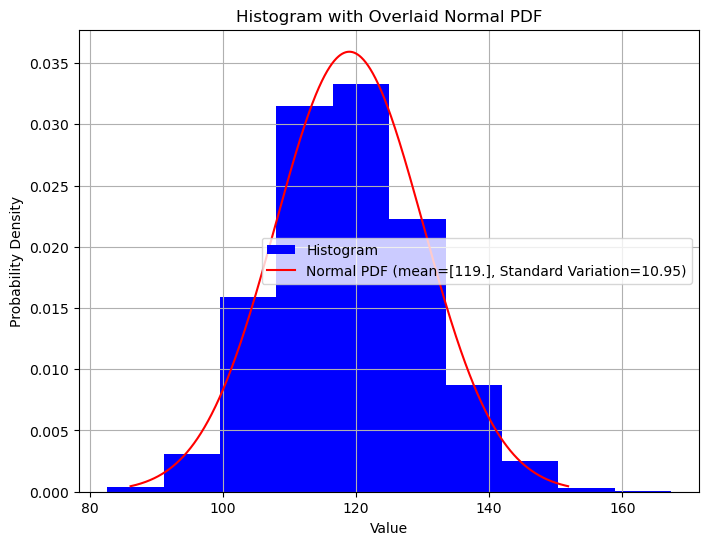

In [19]:

from scipy.stats import norm

plt.figure(figsize=(8, 6))
plt.hist(x_cle_trimmed, density=True, color='blue', label='Histogram')

# Generate data for the normal distribution PDF
x = np.linspace(C - 3 * V, C + 3 * V, 1000)
pdf_normal = norm.pdf(x, loc=C, scale=11.103283040059168)

plt.plot(x, pdf_normal, 'r', label=f'Normal PDF (mean={C}, Standard Variation={V:.2f})')

plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Histogram with Overlaid Normal PDF')
plt.legend()

plt.grid()
plt.show()


In [23]:
#OU Process
def OU(beta,k, n, alpha, dt):
    x = [x0]
    for i in range(len(t) - 1):
        dxi = np.random.normal(0, 1, 3) 
        x_curr = x[-1]
        
        

        F = (
            -beta * (pow(x_n, n-1)*n*k / (pow(k, n) + pow(x_n, n))**2) +
            alpha)
        
        G = (
            np.sqrt(beta * (pow(x_n, n) / (pow(k, n) + pow(x_n, n)))  +
            alpha * x_n)) * dxi[0]
        
        x_next =  x_curr+(x_n-x_curr)* dt * F + np.sqrt(dt) * G

        x = np.hstack([x, x_next])
    return x


In [26]:
beta=1.2
k=1
n=1
alpha=0.01
t = t_trimmed
dt = t[1] - t[0]
x0=200
x_n=119
x_ou = OU(beta, k, n, alpha, dt)

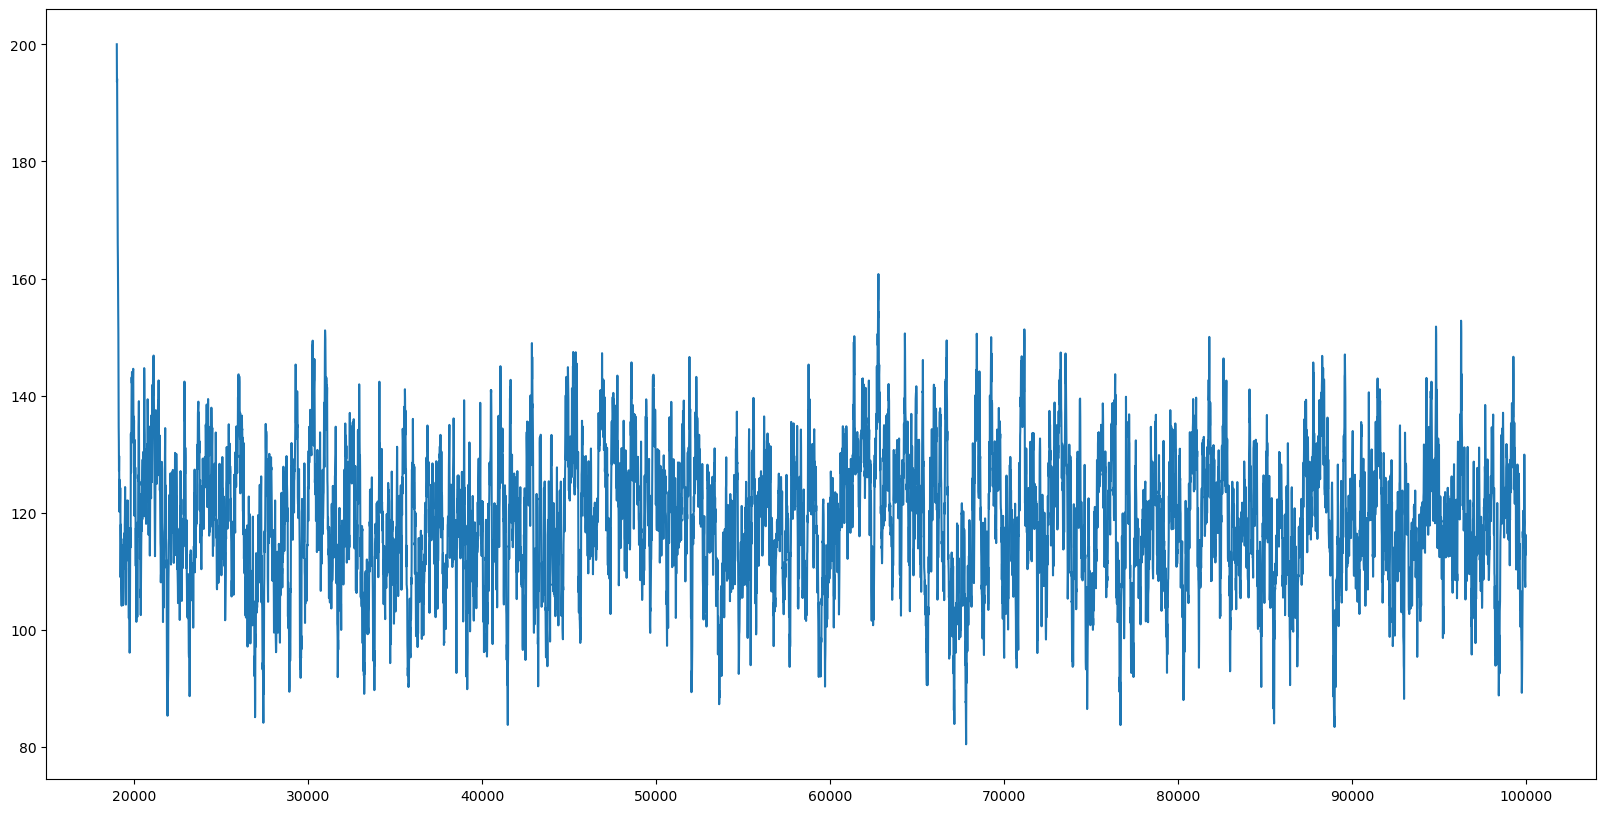

In [27]:
plt.figure(figsize=(20, 10))
plt.plot(t_trimmed, x_ou, label='OU')

In [48]:
np.mean(x_ou)

118.85139089875118

[2.75370481 2.75458996 2.75547511 ... 9.83225748 9.83314263 9.83402778]


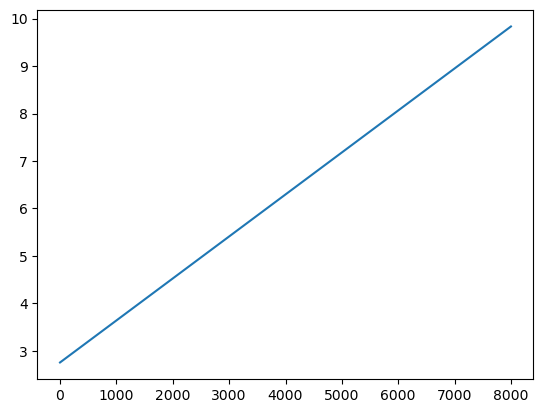

In [73]:
auto=(B/2*A)*np.exp(-2*A*t)
print(auto)
plt.plot(auto)

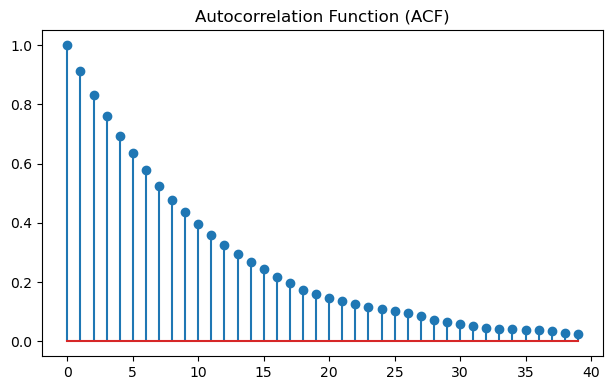

In [30]:
# Calculate the autocorrelation function (ACF)
acf = sm.tsa.acf(x_ou, fft=False)


# Calculate the partial autocorrelation function (PACF)
pacf = sm.tsa.pacf(x_ou_trimmed)

# Plot the ACF
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.stem(acf)
plt.title('Autocorrelation Function (ACF)')

plt.tight_layout()
plt.show()


In [31]:
print(acf)

[1.         0.91298185 0.8327856  0.75963508 0.69489287 0.63473162
 0.5774416  0.52525535 0.4778074  0.43526373 0.39501162 0.36024704
 0.32666357 0.29589464 0.26779821 0.24349921 0.21797822 0.19688098
 0.17517166 0.15965439 0.14695154 0.13684484 0.12545279 0.11719849
 0.10872745 0.10265124 0.0944933  0.0854002  0.07405628 0.06579033
 0.06042313 0.05341838 0.04692047 0.04294379 0.04045569 0.0383445
 0.03820049 0.03520276 0.0300439  0.02585657]


In [32]:
threshold = 0.2
autocorrelation_time = next(i for i, acf_value in enumerate(acf) if acf_value < threshold)

print(f"Autocorrelation Time: {autocorrelation_time}")

Autocorrelation Time: 17


In [39]:
#Gillespy
import gillespy2

def ToggleSwitch(parameter_values=None):
    # Initialize the model
    model = gillespy2.Model(name="toggle_switch")

    # Define parameters
    
    beta2 = gillespy2.Parameter(name='beta2', expression=1.2)
    k2 = gillespy2.Parameter(name='k2', expression=1.0)
    n2 = gillespy2.Parameter(name='n2', expression=1.0)
    alpha = gillespy2.Parameter(name='alpha', expression=0.01)
     
    model.add_parameter([beta2, k2, n2, alpha])
    # Define molecular species
    x = gillespy2.Species(name='x', initial_value=200)
   
    model.add_species([x])

    # Define reactions
    #cu = gillespy2.Reaction(name="r1", reactants={}, products={x: 1},
                            #propensity_function="beta1*(pow(a,n1)/(pow(a,n1)+pow(x,n1)))")#degradation
    cv = gillespy2.Reaction(name="r2", reactants={x:1}, products={},
                            propensity_function="alpha*x")
    du = gillespy2.Reaction(name="r3", reactants={}, products={x:1},
                            propensity_function="beta2*(pow(x,n2)/(pow(k2,n2)+pow(x,n2)))")
    
    model.add_reaction([du, cv])

    tspan = t_trimmed
    model.timespan(tspan)

    return model


In [40]:
model = ToggleSwitch()
ssa_results = model.run(algorithm="Tau-Leaping")

In [41]:

beta2=1.2
k2=1
n2=1
alpha=0.01
dt = 10000 #increment
x_ssa = ssa_results['x']
t_ssa = ssa_results['time']


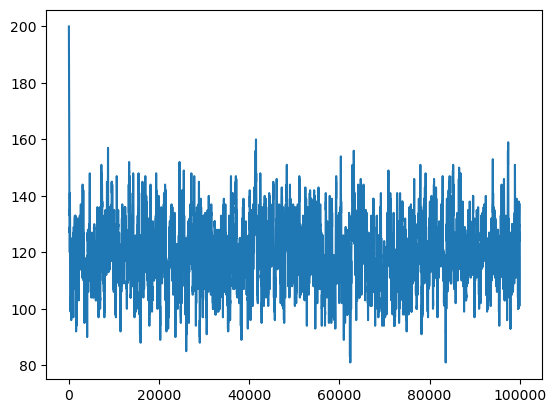

In [42]:
plt.plot(t_ssa, x_ssa,label = 'ssa')

In [43]:
x_ssa_trimmed = x_ssa[1000:]
t_trimmed = t[1000:]

In [44]:
x_ssa_trimmed.size

10111

In [45]:
t_trimmed.size

8000

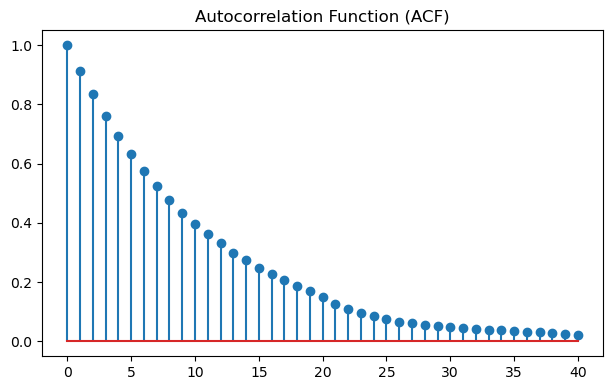

In [46]:

acf = sm.tsa.acf(x_ssa_trimmed, fft=False)


# Calculate the partial autocorrelation function (PACF)
pacf = sm.tsa.pacf(x_ssa_trimmed)

# Plot the ACF
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.stem(acf)
plt.title('Autocorrelation Function (ACF)')



plt.tight_layout()
plt.show()


In [47]:
threshold = 0.2
autocorrelation_time = next((i for i, acf_value in enumerate(acf) if acf_value < threshold), None)

if autocorrelation_time is not None:
    print(f"Autocorrelation Time: {autocorrelation_time}")
else:
    print("No value in the ACF array is less than the threshold.")


Autocorrelation Time: 18
